In [76]:
#importing data libraries

#for mathematical calculations
import pandas as pd 
import numpy as np

#for data vaisualizations
import seaborn as sns

#for plotting
import matplotlib.pyplot as plt

import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [77]:
#Reading Data

train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

In [78]:
#making a copy to ensure not loosing data in case of any changes

train_original = train.copy() 
test_original = test.copy()

In [79]:
#Understanding the data

train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [80]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [81]:
# Print data types for each variable
#object means categorical variables and int and flot are numerical variables
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [82]:
#Let’s look at the shape of the dataset - means number of rows and columns in the dataset

train.shape, test.shape

((614, 13), (367, 12))

In [83]:
#this means train has 614 rows and 13 columns. test has 367 rows and 12 columns 

In [84]:
#Univariate Analysis

#In this section, we will do a univariate analysis. It is the easiest form of analyzing data where we analyze each variable individually. 
#For categorical features, we can use frequency tables or bar plots to calculate the number of each category in a particular variable.
#Probability Density Functions(PDF) can be used to look at the distribution of the numerical variables.

In [85]:
#Target Variable - doing frequency table, percentage distribution, and bar plot.

#Frequency Table

train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [86]:
# Normalize can be set to True to print proportions instead of number

#Percentage distribution

train['Loan_Status'].value_counts(normalize = True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

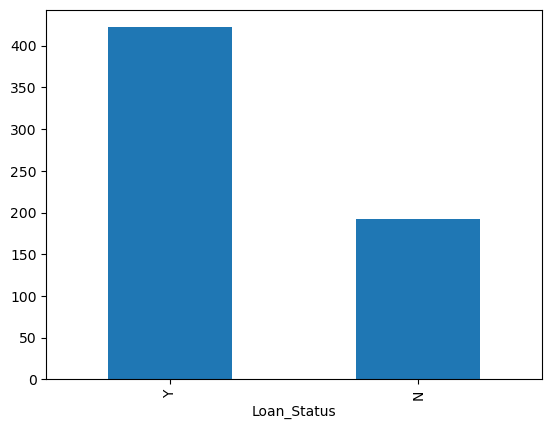

In [87]:
#bar plot

train['Loan_Status'].value_counts().plot.bar()
plt.show()

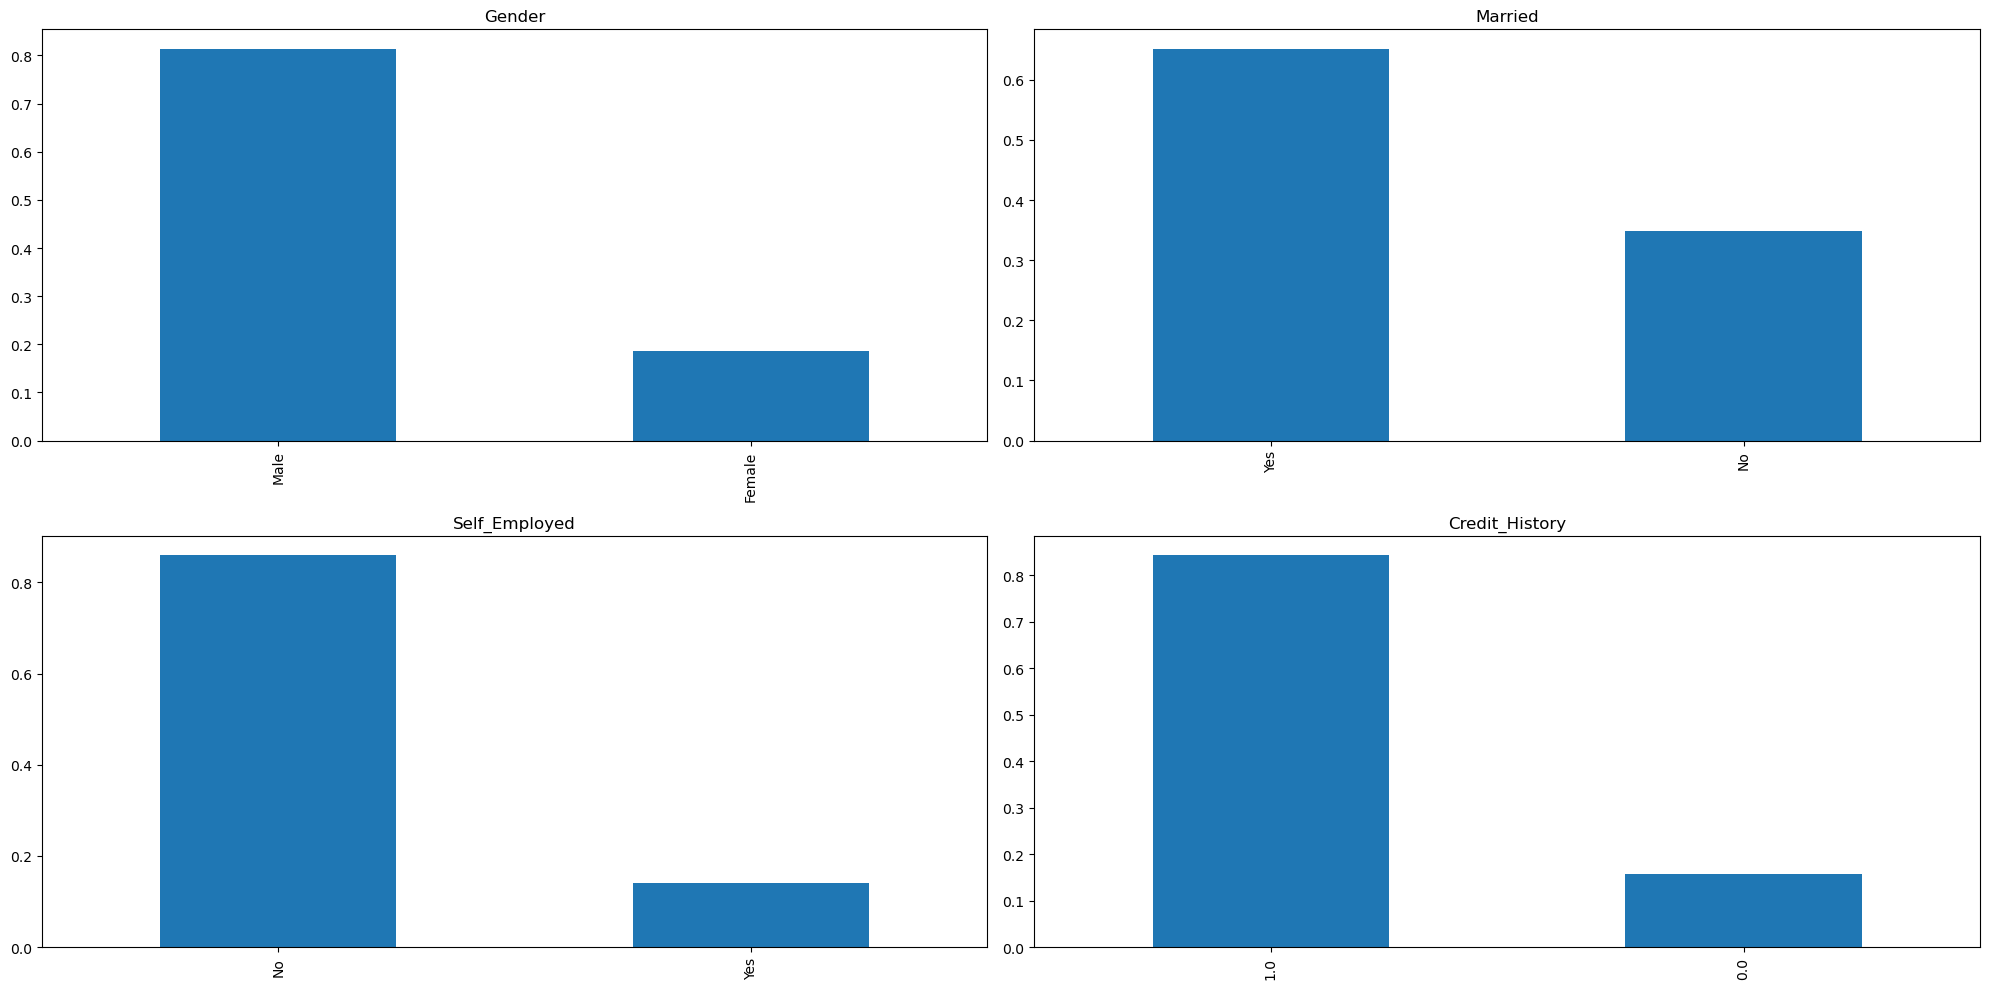

In [88]:
#Analyzing each independent variable

plt.figure(figsize=(20, 10)) 

plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender').set_xlabel('')

plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married').set_xlabel('')


plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed').set_xlabel('')


plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History').set_xlabel('')


plt.tight_layout()

plt.show()

In [89]:
#It can be inferred from the above bar plots that:

#80% of applicants in the dataset are male.
#Around 65% of the applicants in the dataset are married.
#About 15% of applicants in the dataset are self-employed.
#About 85% of applicants have repaid their debts.

In [90]:
#Analiyzing ordinal variables

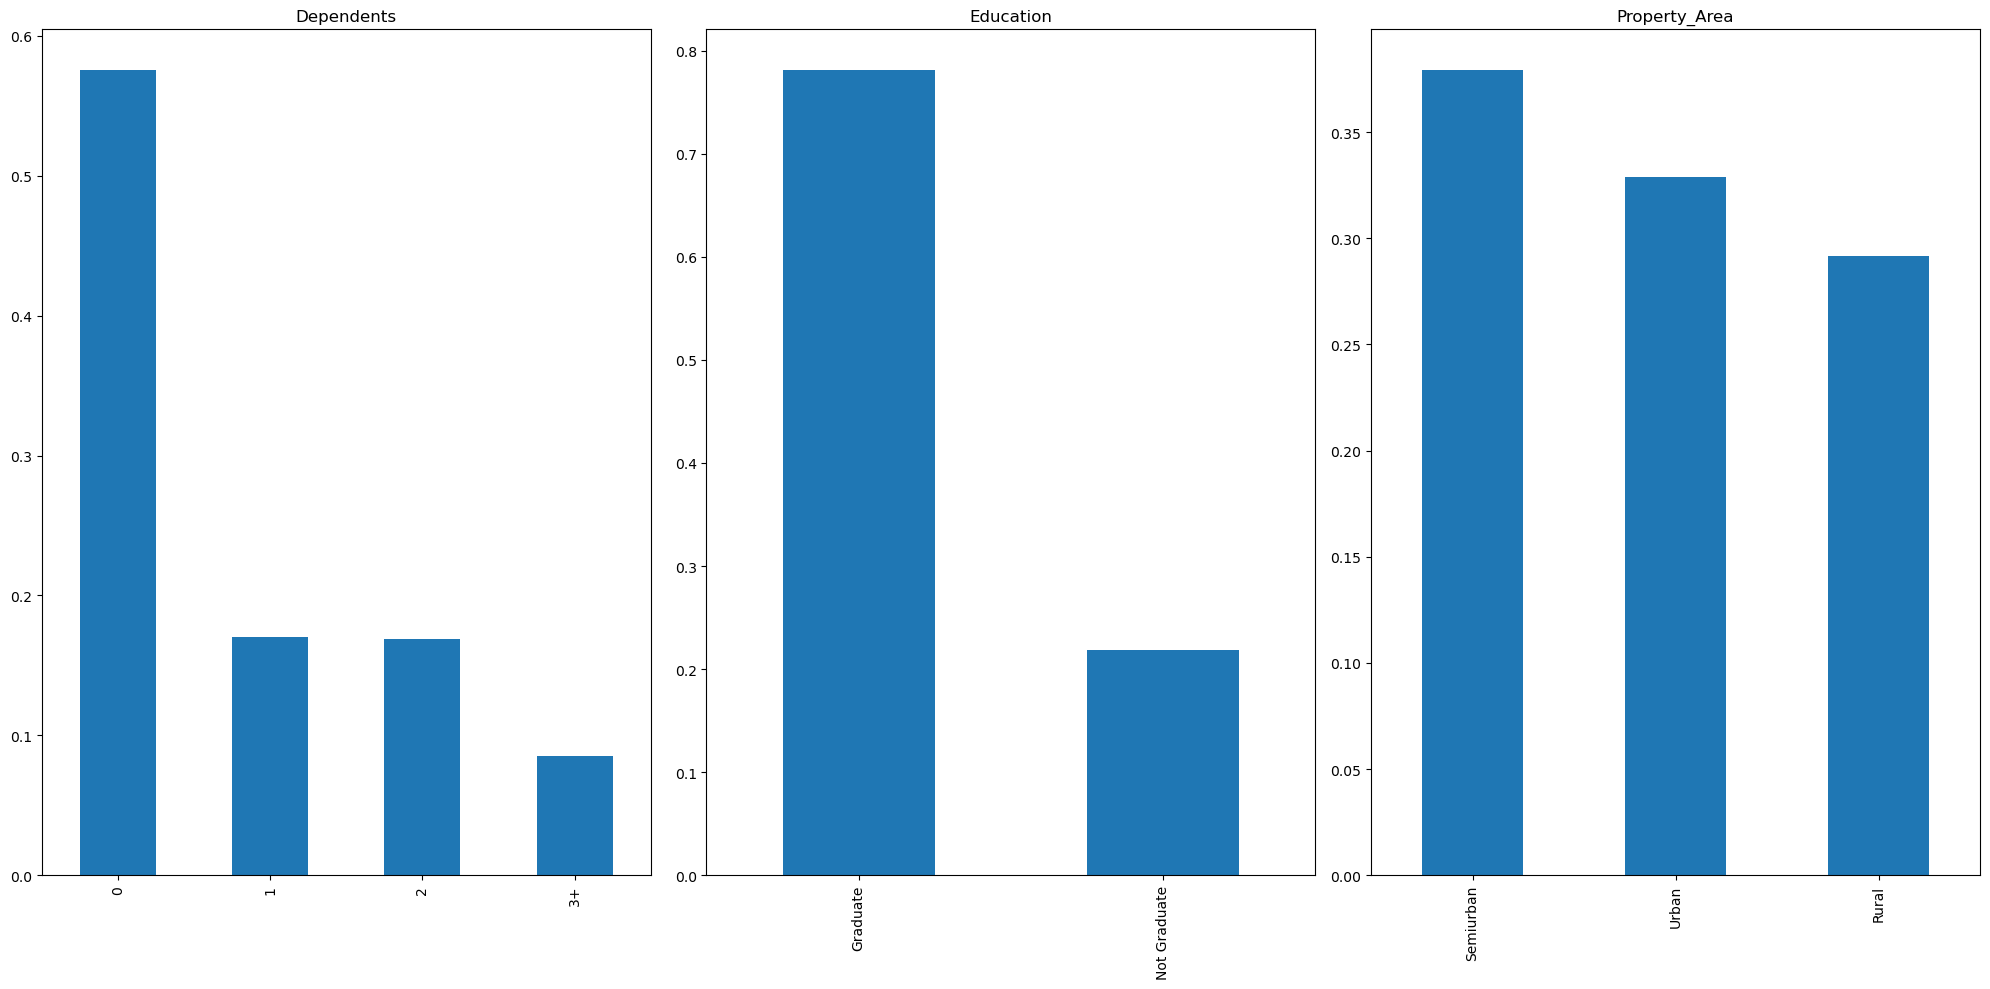

In [91]:


plt.figure(figsize=(20, 10)) 

plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents').set_xlabel('')

plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education').set_xlabel('')


plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area').set_xlabel('')


plt.tight_layout()

plt.show()


In [92]:
#Following inferences can be made from the above bar plots:

#Most of the applicants don’t have dependents.
#About 80% of the applicants are graduates.
#Most of the applicants are from semi-urban areas.

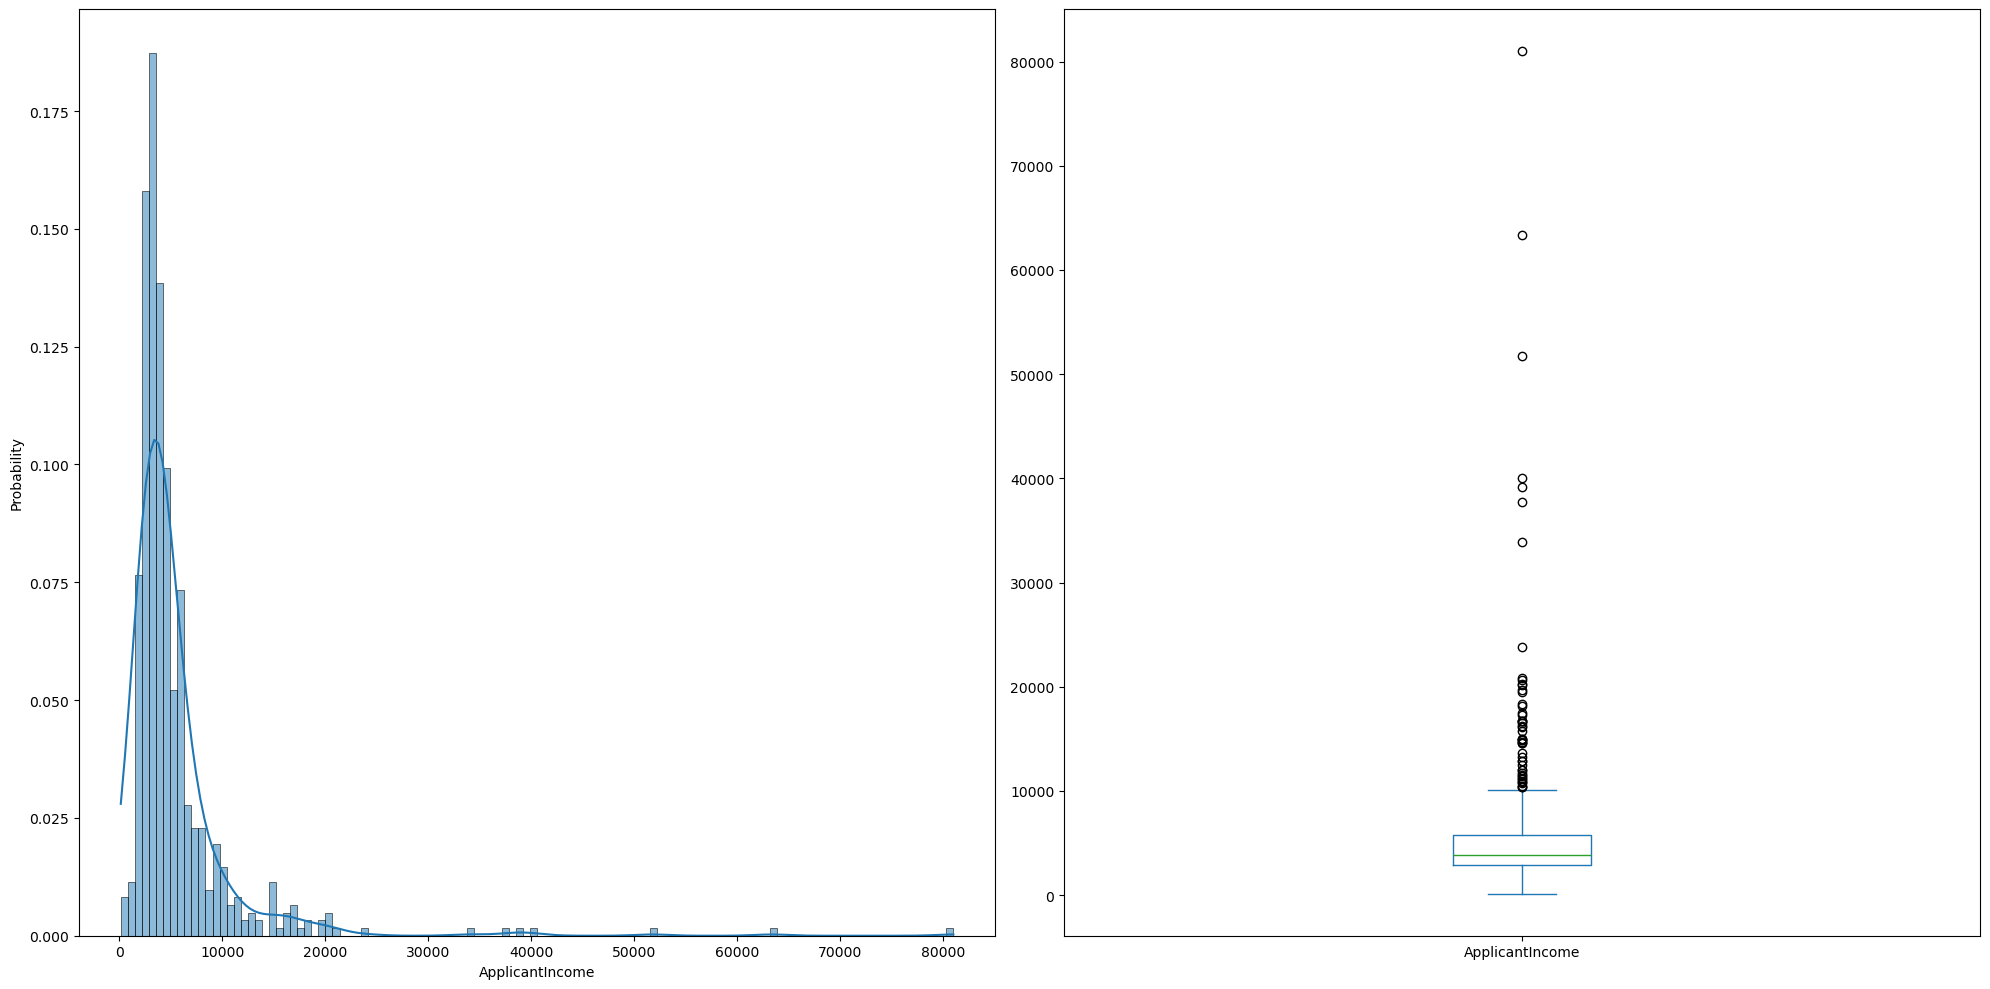

In [93]:
#Analysing numeric variables - using distributions

#Let’s look at the distribution of Applicant income first.

plt.figure(figsize=(20, 10)) 

plt.subplot(121) 
sns.histplot(train['ApplicantIncome'], kde = True, stat='probability')

plt.subplot(122) 
train['ApplicantIncome'].plot.box()

plt.tight_layout()
plt.show()

In [94]:
#It can be inferred that most of the data in the distribution of applicant income 
# are towards the left which means it is not normally distributed. 
# We will try to make it normal in later sections as algorithms work better if the data is normally distributed.

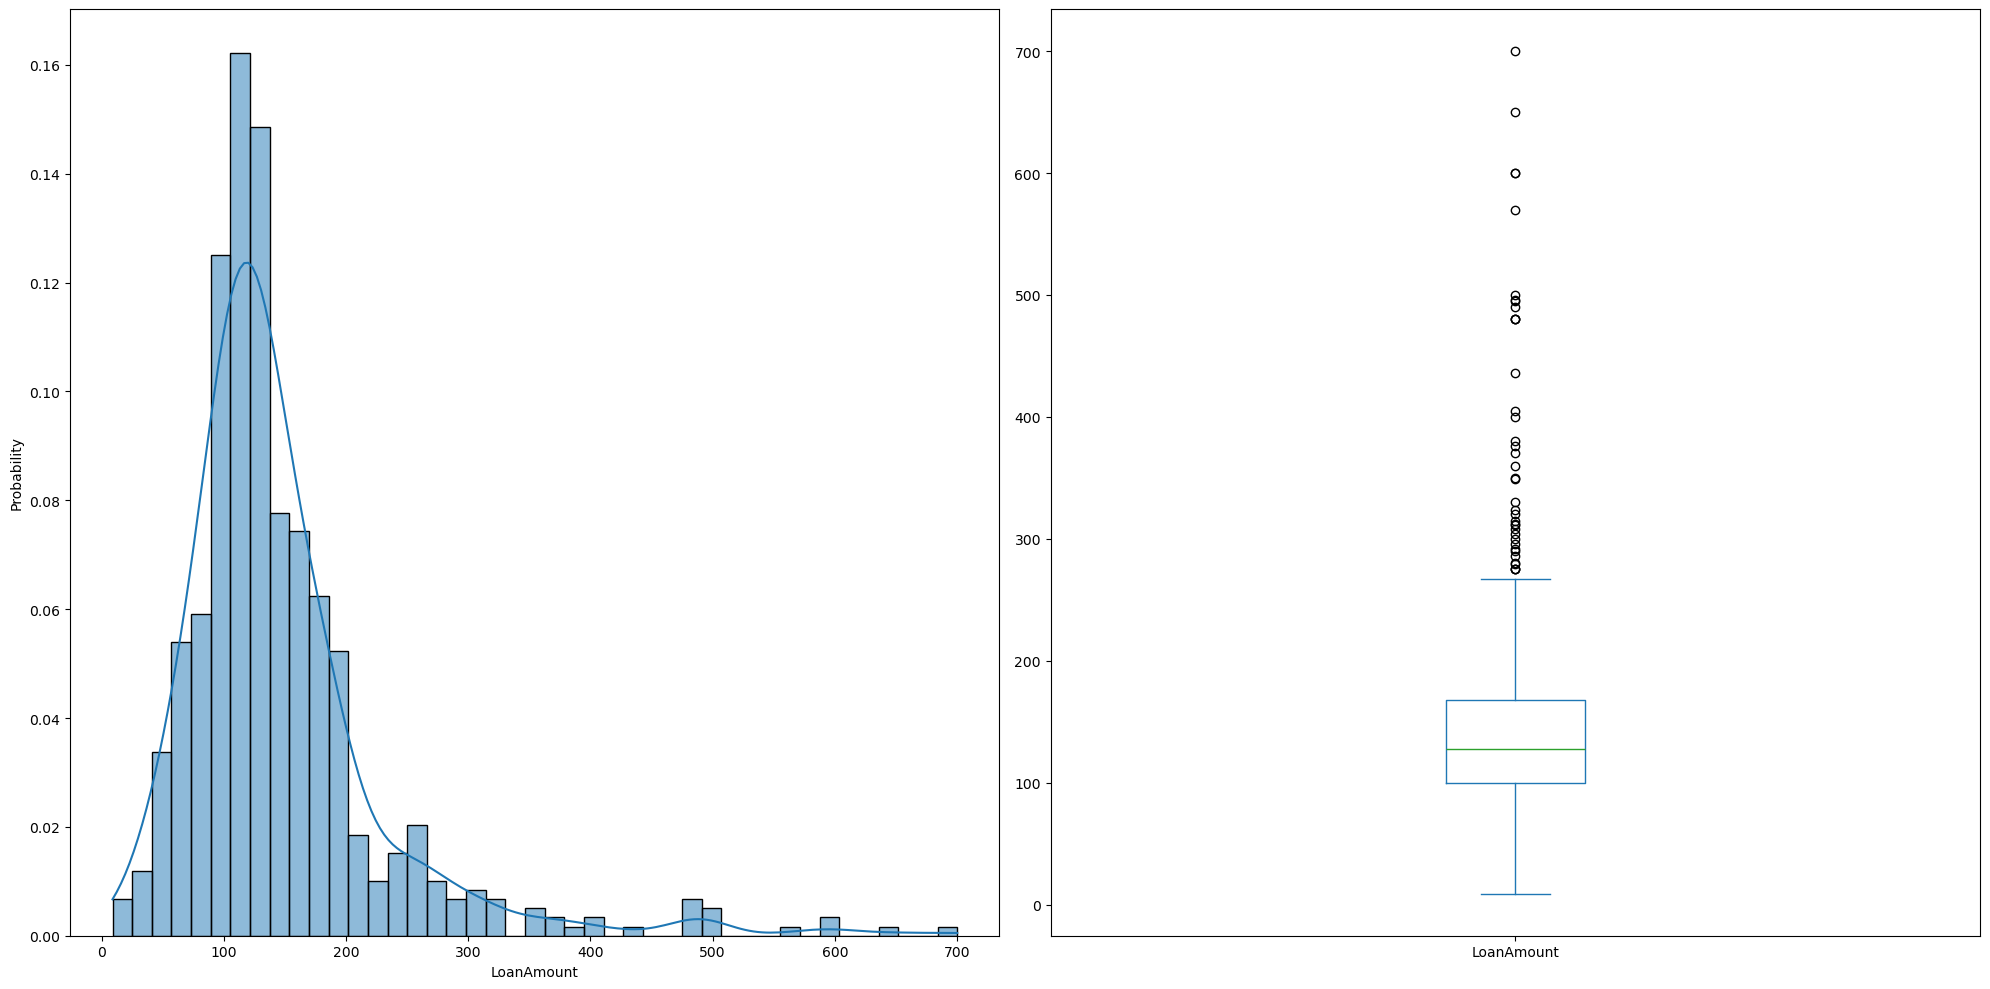

In [95]:
#Let’s look at the distribution of the LoanAmount variable

plt.figure(figsize=(20, 10)) 

plt.subplot(121) 
sns.histplot(train['LoanAmount'], kde = True, stat='probability')

plt.subplot(122) 
train['LoanAmount'].plot.box()

plt.tight_layout()
plt.show()

In [96]:
# We see a lot of outliers in this variable and the distribution is fairly normal.
# We will treat the outliers in later sections.

In [97]:
#Bivariate Analysis - Analysing impact of independent variales on the dependant variable (Loan_Status)

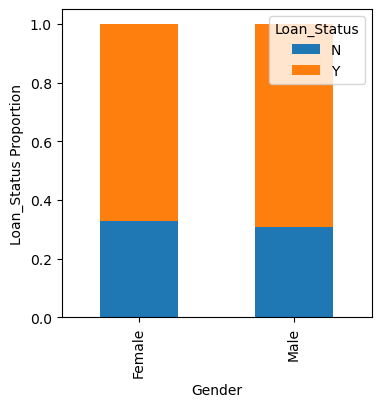

In [98]:
#Gender and Loan_Status

#First of all, we will find the relation between the target variable and categorical independent variables. 
# Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

Gender = pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(4,4))
plt.ylabel("Loan_Status Proportion")
plt.show()

In [99]:
#It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

#Now let us visualize the remaining categorical variables vs the target variables.

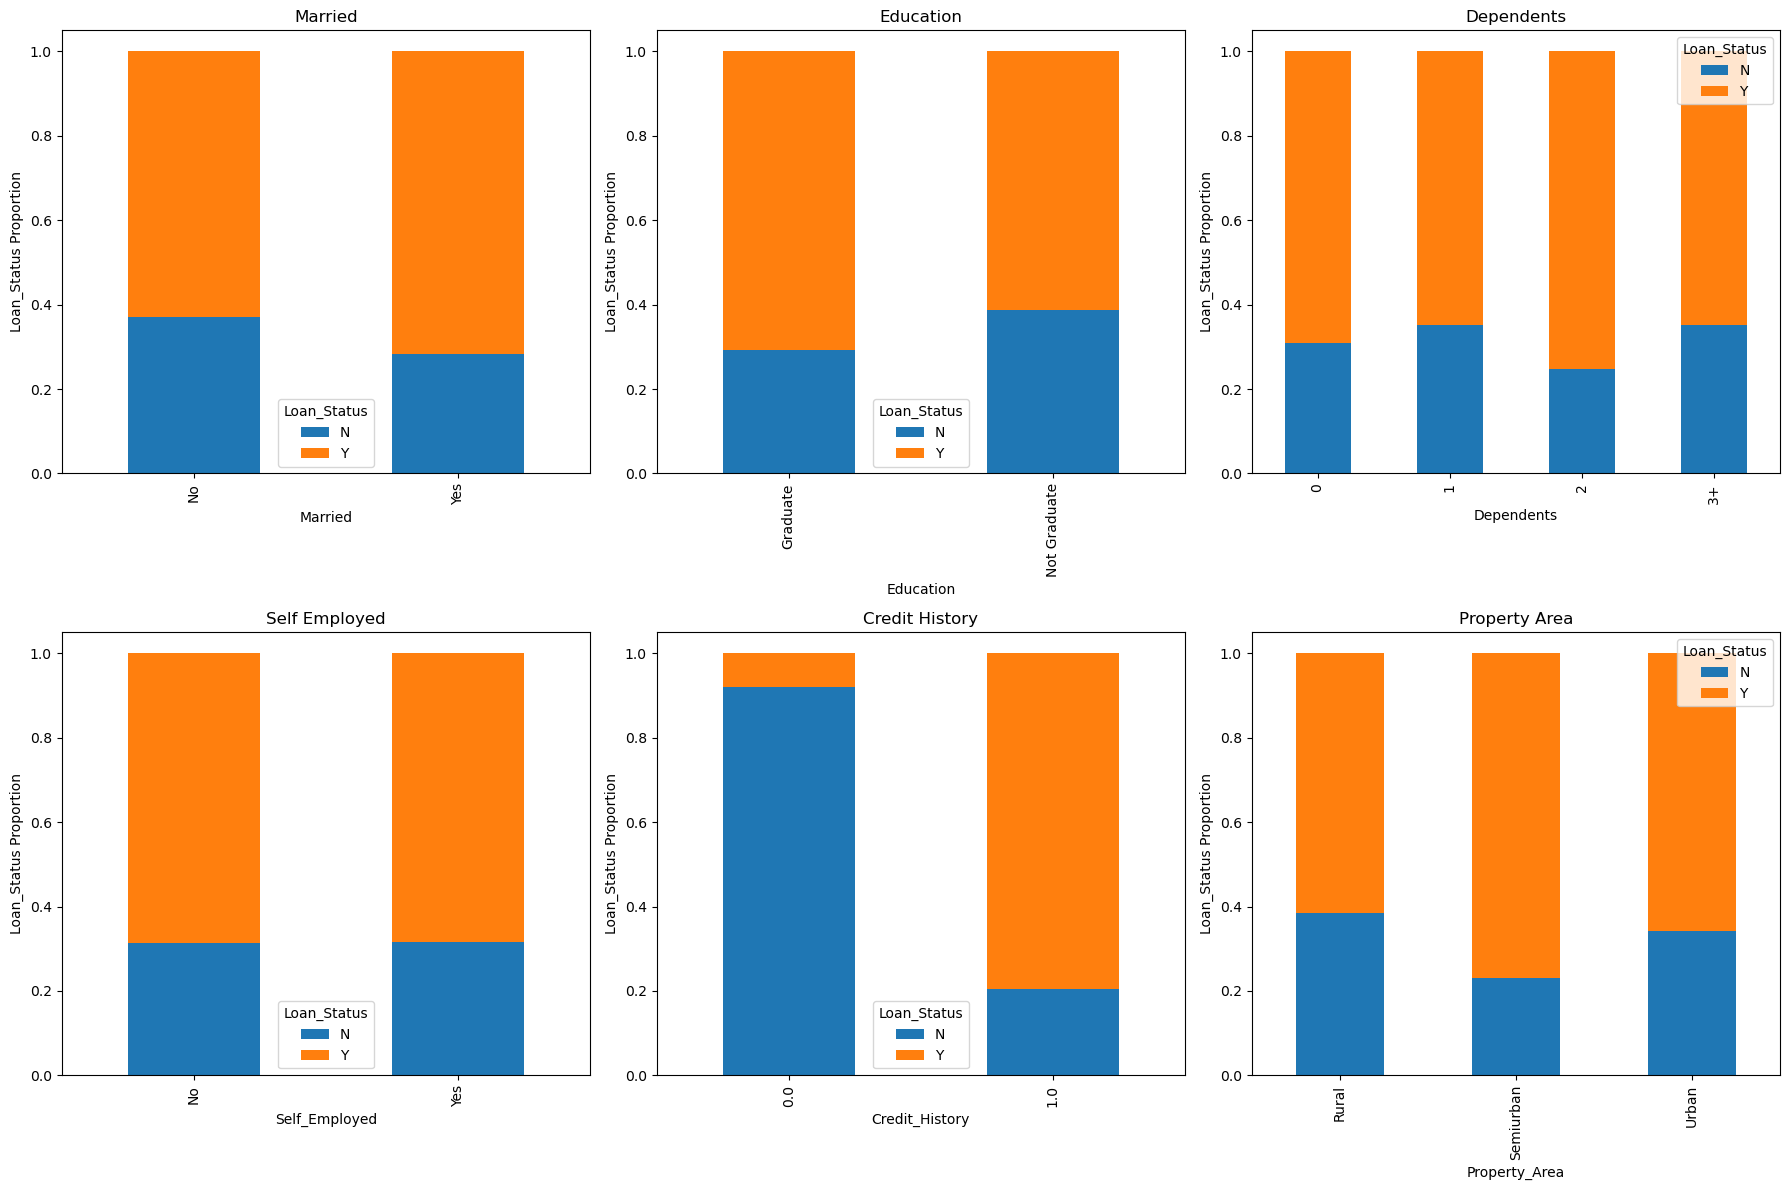

In [100]:
# Create crosstabs
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

# Create a figure
plt.figure(figsize=(18, 12))

# Plot each subplot with ax=
ax1 = plt.subplot(231)
Married.div(Married.sum(1).astype(float), axis=0).plot.bar(stacked=True, ax=ax1)
ax1.set_ylabel("Loan_Status Proportion")
ax1.set_title("Married")

ax2 = plt.subplot(232)
Education.div(Education.sum(1).astype(float), axis=0).plot.bar(stacked=True, ax=ax2)
ax2.set_ylabel("Loan_Status Proportion")
ax2.set_title("Education")

ax3 = plt.subplot(233)
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot.bar(stacked=True, ax=ax3)
ax3.set_ylabel("Loan_Status Proportion")
ax3.set_title("Dependents")

ax4 = plt.subplot(234)
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot.bar(stacked=True, ax=ax4)
ax4.set_ylabel("Loan_Status Proportion")
ax4.set_title("Self Employed")

ax5 = plt.subplot(235)
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot.bar(stacked=True, ax=ax5)
ax5.set_ylabel("Loan_Status Proportion")
ax5.set_title("Credit History")

ax6 = plt.subplot(236)
property_Area.div(property_Area.sum(1).astype(float), axis=0).plot.bar(stacked=True, ax=ax6)
ax6.set_ylabel("Loan_Status Proportion")
ax6.set_title("Property Area")

plt.tight_layout()
plt.show()

In [101]:
#The proportion of married applicants is higher for the approved loans.
#The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
#There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
#It seems people with a credit history of 1 are more likely to get their loans approved.
#The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.

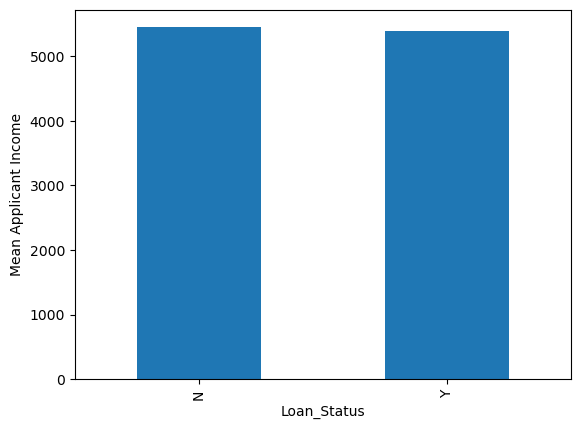

In [102]:
#Analysing Numerical Independent Variable vs Target Variable

#We will try to find the mean income of people for which the loan has been approved vs 
#the mean income of people for which the loan has not been approved.

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar().set_ylabel('Mean Applicant Income')
plt.show()

In [103]:
#Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. 
# So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [104]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins= bins,labels = group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])

Income_bin

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very high,46,91


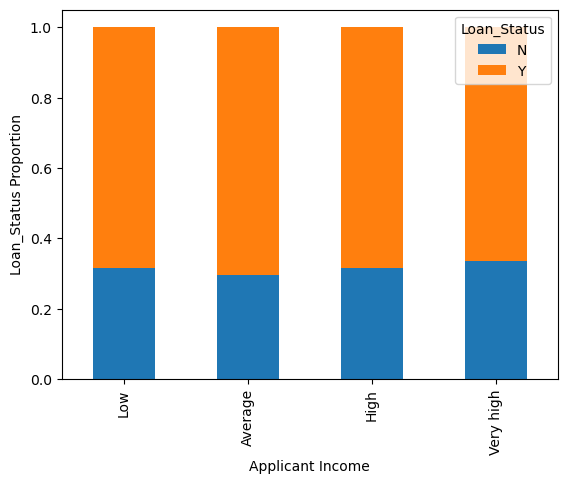

In [105]:
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot.bar(stacked=True).set_ylabel("Loan_Status Proportion")
plt.xlabel('Applicant Income')
plt.show()

In [106]:
#It can be inferred that Applicant’s income does not affect the chances of loan approval 
# which contradicts our hypothesis 
# in which we assumed that if the applicant’s income is high the chances of loan approval will also be high.

In [107]:
#Doing the same analysis using CoapplicantIncome

bins = [0,1000,3000,42000] 
group = ['Low','Average','High'] 
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins = bins,labels = group)


Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])

Coapplicant_Income_bin

Loan_Status,N,Y
Coapplicant_Income_bin,,
Low,3,19
Average,61,161
High,32,65


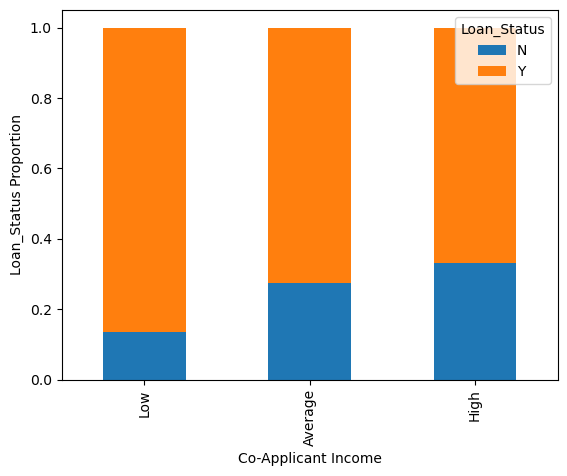

In [108]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot.bar(stacked=True).set_ylabel("Loan_Status Proportion")
plt.xlabel('Co-Applicant Income')
plt.show()

In [109]:
#It shows that if co-applicants income is less the chances of loan approval are high. 
# But this does not look right. 
# The possible reason behind this may be that most of the applicants don’t have any co-applicant 
# so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. 
# So we can make a new variable in which we will combine the applicant’s and co applicants’ income 
# to visualize the combined effect of income on loan approval.

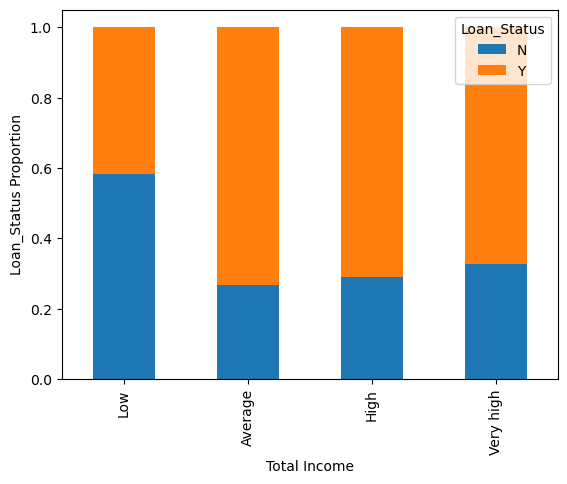

In [110]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']

train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins = bins,labels = group)


Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])

Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot.bar(stacked=True).set_ylabel("Loan_Status Proportion")
plt.xlabel('Total Income')
plt.show()



In [111]:
#We can see that Proportion of loans getting approved for applicants having low Total_Income 
#is very less as compared to that of applicants with Average, High, and Very High Income.

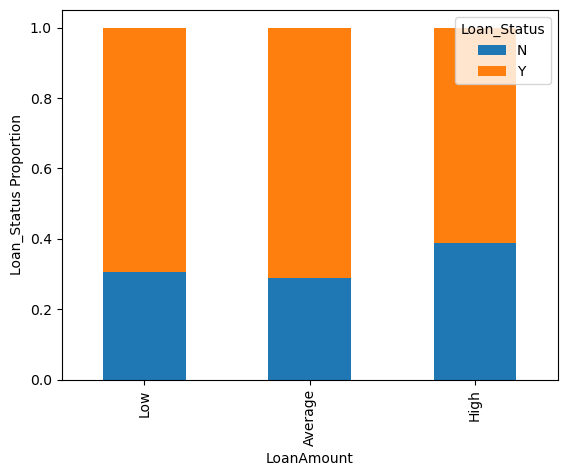

In [112]:
#Let’s visualize the Loan amount variable.

bins=[0, 100, 200, 700]
group=['Low','Average','High']

train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins = bins,labels = group)


LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])

LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot.bar(stacked=True).set_ylabel("Loan_Status Proportion")
plt.xlabel('LoanAmount')
plt.show()

In [113]:
#It can be seen that the proportion of approved loans is higher for Low and Average Loan Amounts 
# as compared to that of High Loan Amounts which supports our hypothesis which considered that the chances of loan approval
# will be high when the loan amount is less.

In [114]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin','LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [115]:
train['Dependents'].replace('3+', 3 ,inplace = True)
test['Dependents'].replace('3+', 3 ,inplace = True) 
train['Loan_Status'].replace('N', 0,inplace = True) 
train['Loan_Status'].replace('Y', 1,inplace = True)

<Axes: >

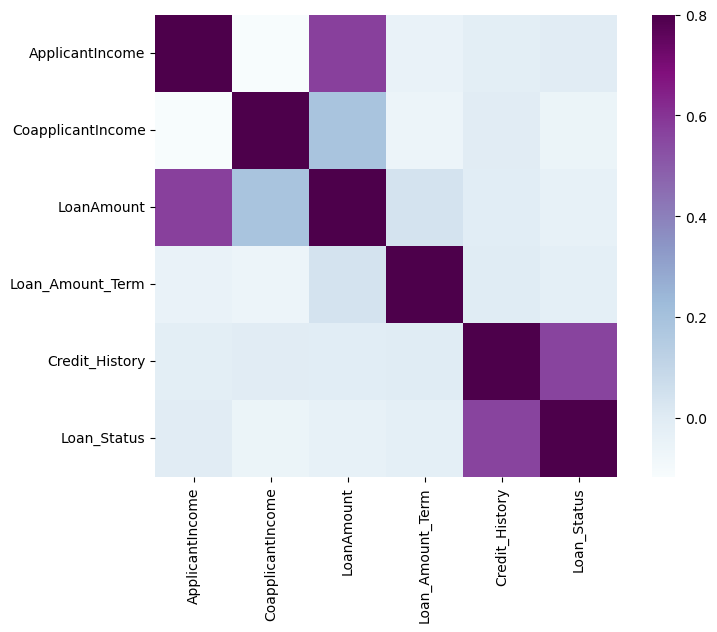

In [116]:
#Now let’s look at the correlation between all the numerical variables. 
# We will use the heat map to visualize the correlation. 
# Heatmaps visualize data through variations in coloring. 
# The variables with darker colors mean their correlation is more.

matrix = train.corr(numeric_only=True) #Correlation is applicable for numeric values, hence this adjustment
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [117]:
#We see that the most correlated variables are (ApplicantIncome – LoanAmount) and (Credit_History – Loan_Status). 
#LoanAmount is also correlated with CoapplicantIncome.

In [118]:
#Missing Value and Outlier Treatment

#After exploring all the variables in our data, 
# we can now impute the missing values and 
# treat the outliers because missing data and outliers can adversely affect the model performance.

In [119]:
#Missing value Imputation

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [120]:
#There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

In [121]:
#We will treat the missing values in all the features one by one.

#We can consider these methods to fill the missing values:

#For numerical variables: imputation using mean or median
#For categorical variables: imputation using mode

In [122]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [123]:

#Now we will see the LoanAmount variable. 
# As it is a numerical variable, we can use the mean or median to impute the missing values. 
# We will use the median to fill the null values 
# as earlier we saw that “loan amount” have outliers so the mean will not be the proper approach 
# as it is highly affected by the presence of outliers.

In [124]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [125]:
#Now let’s check whether all the missing values are filled in the dataset.

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [126]:
#As we can see that all the missing values have been filled in the train dataset. 
#Let’s fill all the missing values in the test dataset too with the same approach.

test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [127]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

test.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [128]:
#Outlier Treatment

#As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them 
#as the presence of outliers affects the distribution of the data. 
# outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. 
# We must take steps to remove outliers from our data sets. 


# From the univariate analysis we observed that due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. 
# One way to remove the skewness is by doing the log transformation. 
# As we take the log transformation, it does not affect the smaller values much but reduces the larger values. 
# So, we get a distribution similar to the normal distribution.


<Axes: >

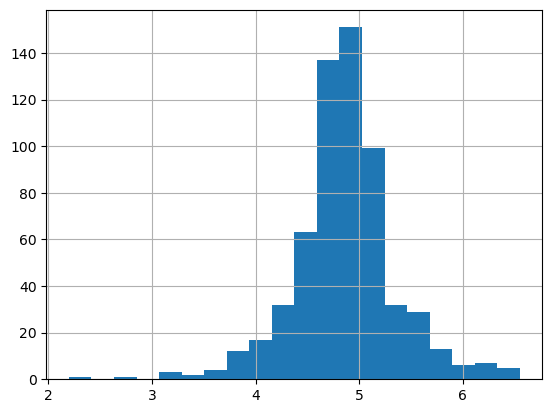

In [129]:
#Let’s visualize the effect of log transformation on the train dataframe.


train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)

In [130]:
# From the above plot, we can see that the train LoanAmount data is now similar to normally distributed.

<Axes: >

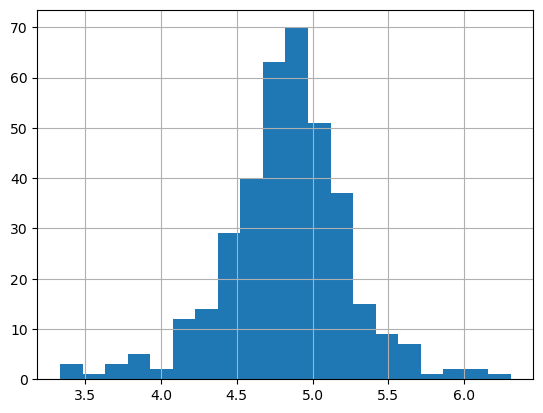

In [131]:
#We will do similar changes to the test dataframe here

test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins = 20)

In [132]:
# From the above plot, we can see that the test LoanAmount data is now similar to normally distributed and the effect of extreme values has been significantly subsided. 
# Logistic regression model will perform better when numeric input features are normally distributed. 
# So now lets run logistic regression and make predictions for the test data set

In [133]:
#Model Building: Part 1

#Let us make our first model predict the target variable. 
# We will start with Logistic Regression which is used for predicting binary outcomes.

In [134]:
# Logistic Regression is a classification algorithm. 
# It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
# Logistic regression is an estimation of the Logit function. 
# The logit function is simply a log of odds in favor of the event.
#This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function

In [135]:
# Let’s drop the Loan_ID variable as it does not have any effect on the loan status. 
# We will do the same changes to the test dataset which we did for the training dataset.


train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [136]:
#We will use “scikit-learn” (sklearn) for making different models which is an open-source library for Python. 
# It is one of the most efficient tools which contains many inbuilt functions that can be used for modeling in Python.

In [137]:
#Sklearn requires the target variable in a separate dataset. 
# So, we will drop our target variable from the training dataset and save it in another dataset.

In [147]:

X = train.drop('Loan_Status', axis = 1)
Y = train.Loan_Status


In [150]:
#logistic regression does not run on categorical variables, 
# hence we need to convert all categorical varialns into numeric using dummies

X = pd.get_dummies(X) 
train = pd.get_dummies(train) 
test = pd.get_dummies(test)

In [151]:
# Now we will train the model on the training dataset and make predictions for the test dataset. 
# But can we validate these predictions? 
# One way of doing this is can divide our train dataset into two parts: train and validation. 
# We can train the model on this training part and using that make predictions for the validation part. 
# In this way, we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

In [152]:
#We will use the train_test_split function from sklearn to divide our train dataset. 
# So first, let us import train_test_split.

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_cv, Y_train, Y_cv = train_test_split(X,Y, test_size =0.3)

In [158]:
#The dataset has been divided into training and validation parts. 

#Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.


from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(X_train, Y_train)

LogisticRegression()

In [159]:
#Let’s predict the Loan_Status for the validation set and calculate its accuracy.

pred_cv = model.predict(X_cv)

In [160]:
#Let us calculate how accurate our predictions are by calculating the accuracy.

accuracy_score(Y_cv,pred_cv)

0.7945945945945946

In [161]:
#So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

In [163]:
#Let’s make predictions for the test dataset.

pred_test = model.predict(test)

In [164]:
#Let’s import the submission file which we have to submit on the solution checker.

submission = pd.read_csv("sample_submission_49d68Cx.csv")


In [165]:
#We only need the Loan_ID and the corresponding Loan_Status for the final submission. 
# we will fill these columns with the Loan_ID of the test dataset and the predictions that we made, i.e., pred_test respectively.

In [168]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']


In [174]:
#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [175]:
#Finally, we will convert the submission to .csv format and make a submission to check the accuracy on the leaderboard.

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')